# Traceability of information

One of the main drawbacks of the data is its traceability. To ensure the quality of the data, we perform an analysis over time to look for jumps in the images (matrices), i.e. we have to make sure that there are no big jumps from one image to another so that if we run a time movie, progressive variations in the data channels are observed.

In [1]:
import utils
import earthpy.plot as ep
import numpy as np
import matplotlib.pyplot as plt
import cv2
import re

from datetime import datetime
from typing import Union, List, Dict, Tuple


In [2]:
# TODO: Changes these values for parameters on a database.
BASE_DIR = '/home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/WisconsinData/Wisconsin'
bands =  ['B4','B3','B2']

# Dict of the images.
images = utils.load_landsat_image(BASE_DIR, bands)

Opening file /home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/WisconsinData/Wisconsin/S-HARMONIZED_20210813T163839_20210813T164340_T16TCN_13Aug2021_B4.tif
Opening file /home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/WisconsinData/Wisconsin/S-HARMONIZED_20210813T163839_20210813T164340_T16TCN_13Aug2021_B3.tif
Opening file /home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/WisconsinData/Wisconsin/S-HARMONIZED_20210813T163839_20210813T164340_T16TCN_13Aug2021_B2.tif
Opening file /home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/WisconsinData/Wisconsin/S-HARMONIZED_20210930T165111_20210930T165533_T16TCN_30Sep2021_B4.tif
Opening file /home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/WisconsinData/Wisconsin/S-HARMONIZED_20210930T165111_20210930T165533_T16TCN_30Sep2021_B3.tif
Opening file /home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/WisconsinData/Wisconsin/S-HARMONIZED_20210930T165

In [4]:
# Call the sort function.
sorted_keys = utils.sort_dict_by_date(images)

/home/aargaez/Downloads/Plant-Growth-Cycle-based-on-geospatial-data/DataExtraction/utils.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=figsize)


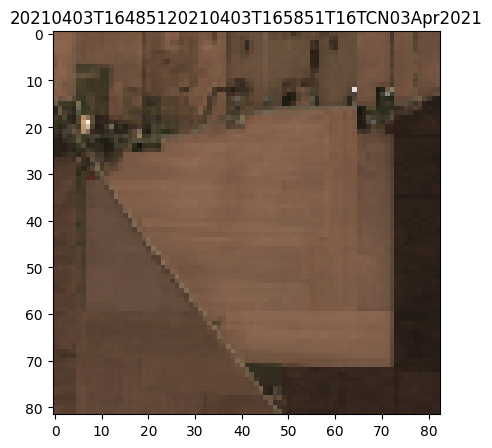

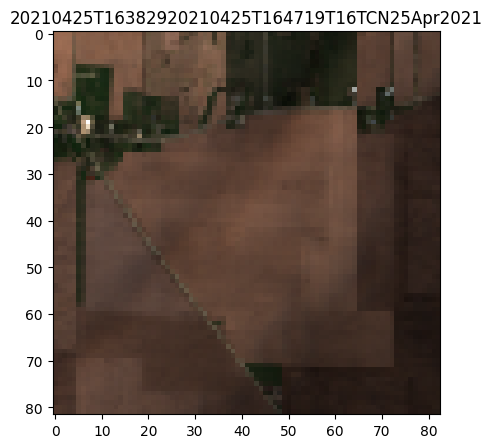

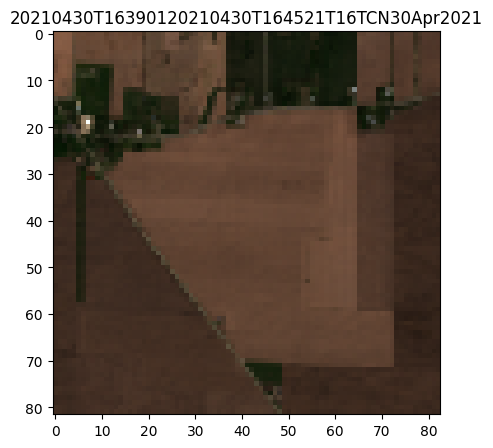

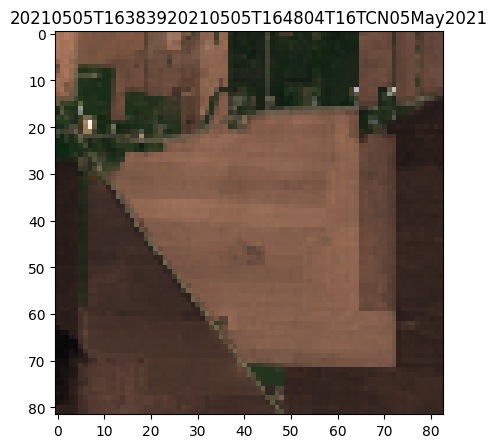

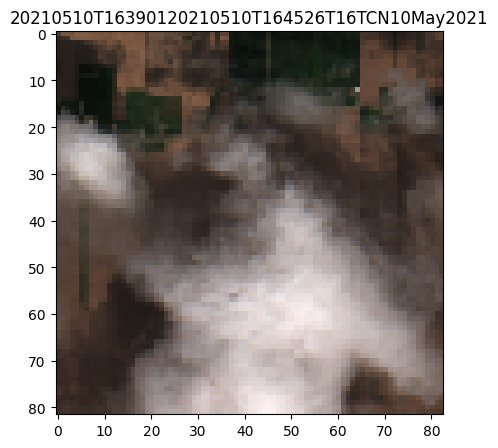

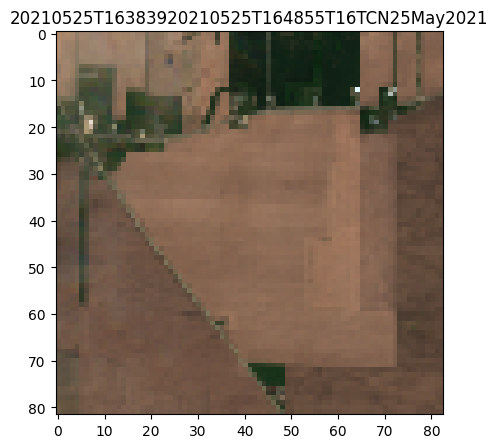

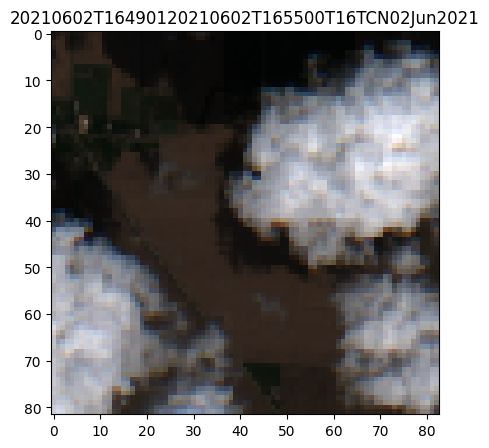

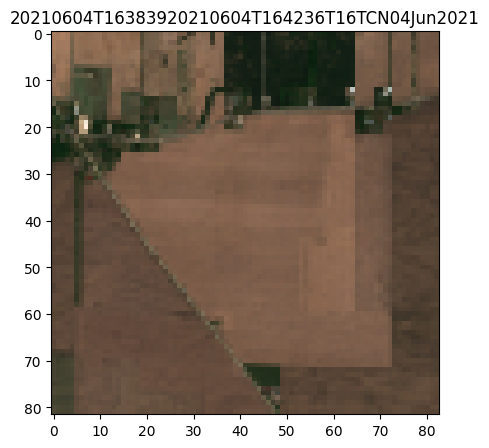

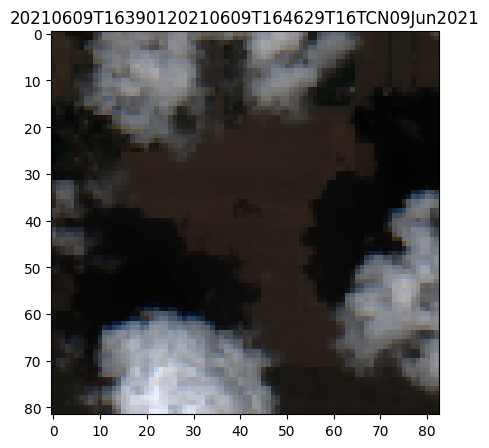

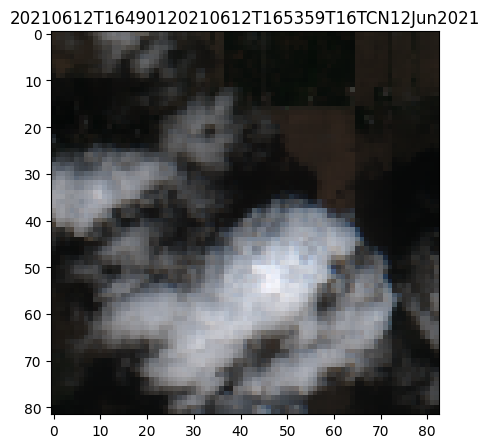

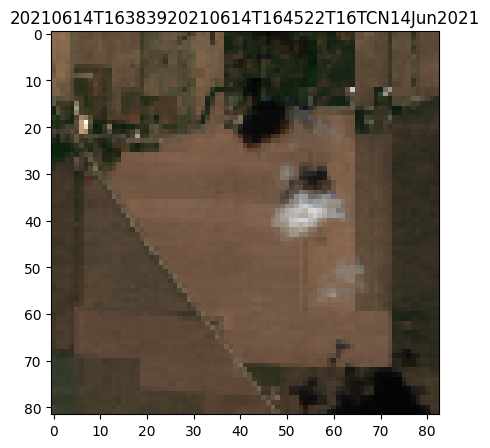

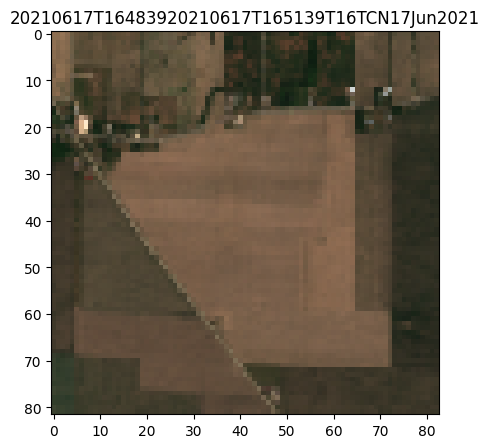

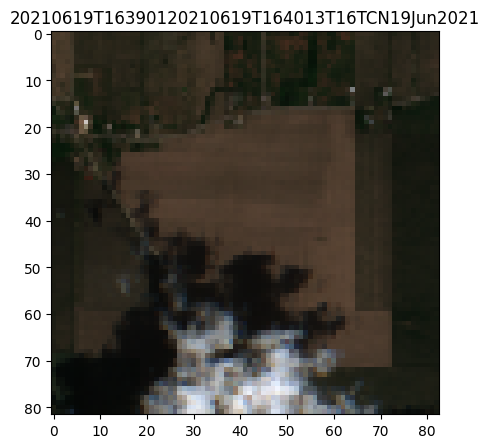

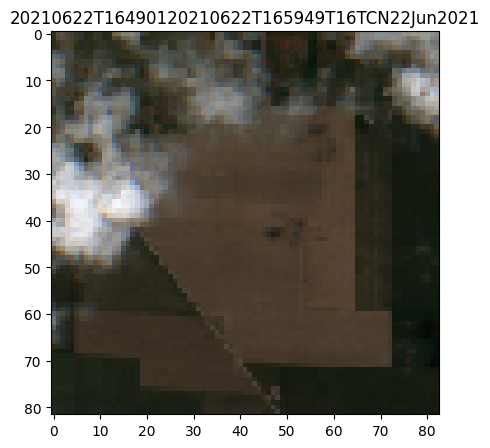

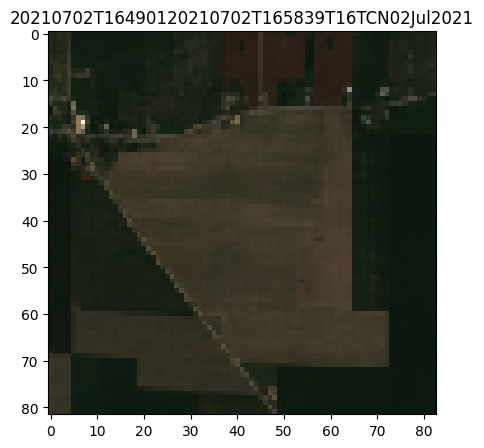

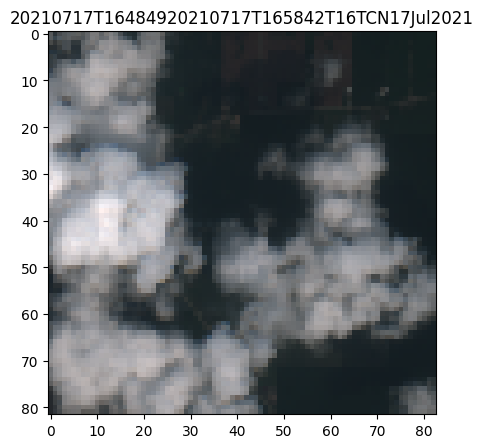

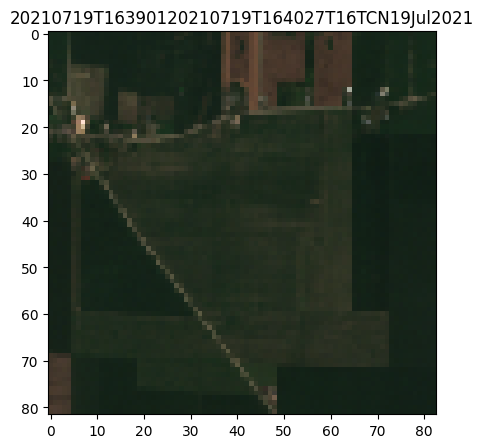

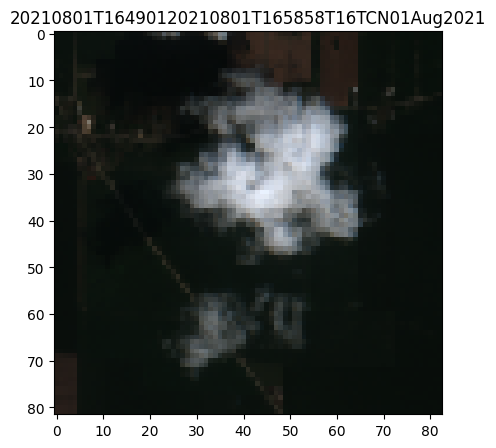

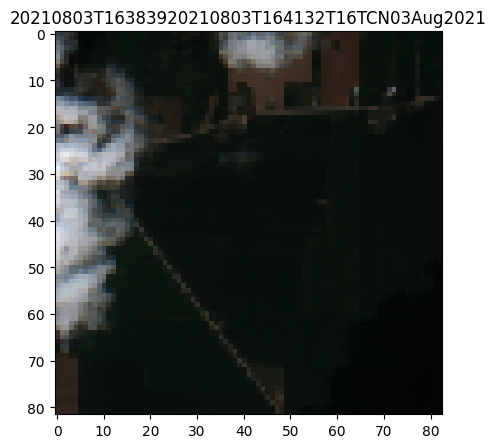

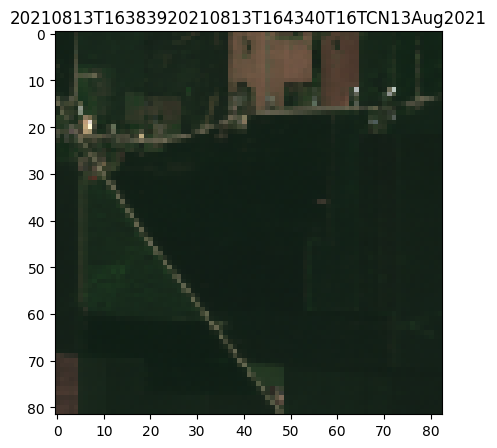

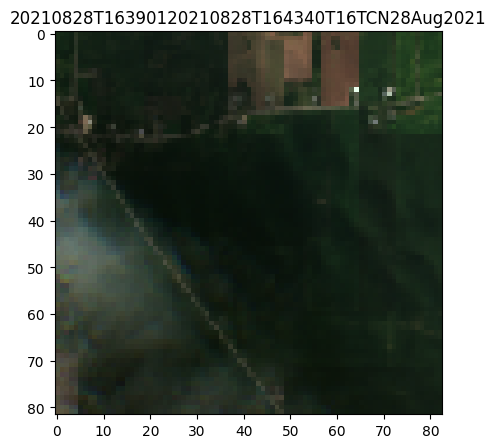

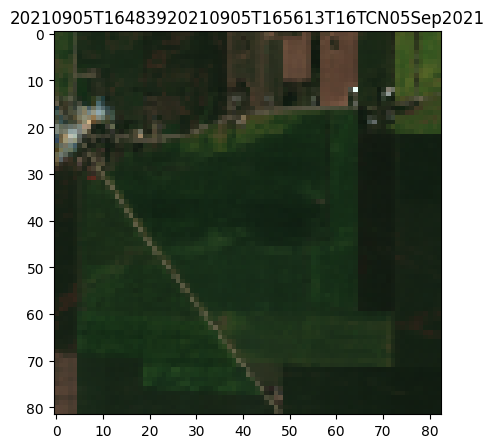

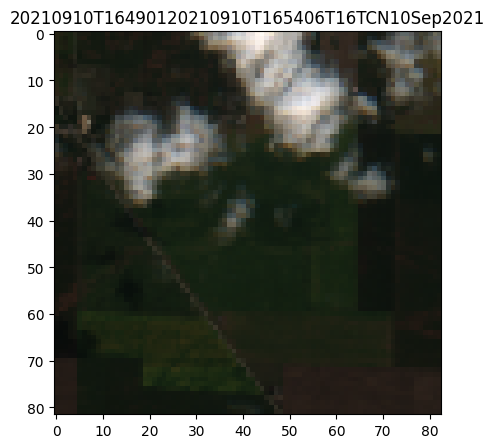

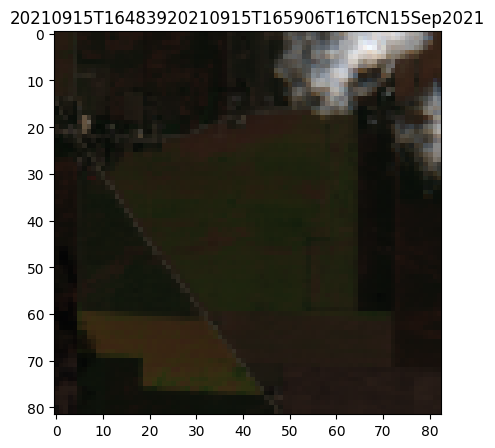

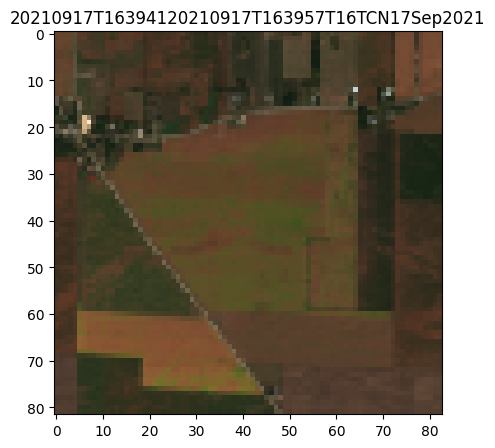

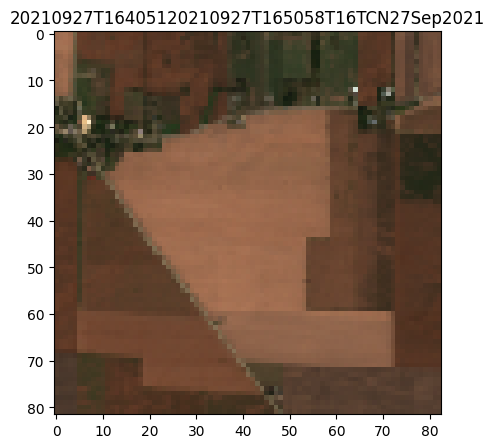

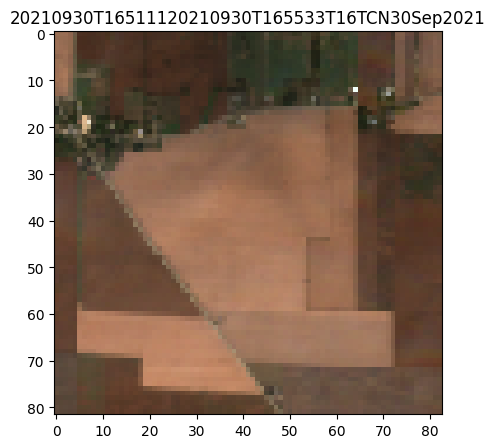

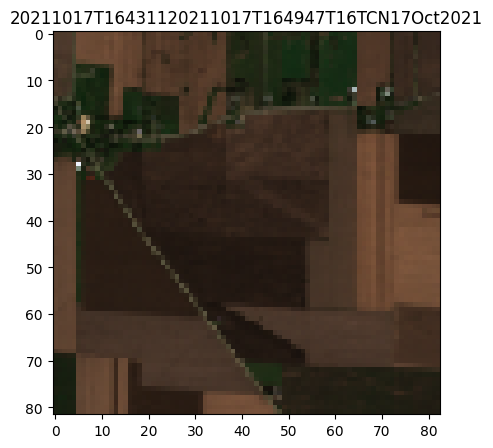

In [6]:
# Iterate over the sorted keys to get the time series analysis.
for key in sorted_keys:
    # Perform operations on each band to ensure there is no jump.
    image = images[key]
    utils.display_rgb(img=image, title=key)

In [7]:
# Iterate over the sorted keys and tapply 8-bit conversion.
eight_bits_images = {key : utils.convert_to_eight_bits(images[key]) for key in sorted_keys}

In [8]:
def time_series_calculator(
    eight_bits_dict: Union[Dict, None],
    sorted_keys: List[str]
) -> None:

    img_differences = []

    # Iterate over the sorted keys to get the time series analysis.
    for i in range(len(sorted_keys)):
        try:
            image1 = eight_bits_dict[sorted_keys[i]]
            image2 = eight_bits_dict[sorted_keys[i + 1]]
        except IndexError:
            image1 = eight_bits_dict[sorted_keys[i]]
            image2 = eight_bits_dict[sorted_keys[0]]
        
        # Element-wise sum of matrix entries.
        img_differences.append(
            cv2.subtract(image2, image1)
        )

    return img_differences
        

In [9]:
time_series = time_series_calculator(eight_bits_dict=eight_bits_images, sorted_keys=sorted_keys)

# for time_diff in time_series:
#     plt.imshow(time_diff, cmap='gray', vmin=0, vmax=255)
#     plt.colorbar()
#     plt.show()

In [10]:
time_series

[array([[[18, 10,  9],
         [21, 15, 13],
         [19,  9,  9],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[18, 11,  9],
         [20, 13, 12],
         [20, 12, 10],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[16,  8,  8],
         [20, 13, 11],
         [19, 10, 10],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        ...,
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]], dtype=uint8),
 array([[[ 0,  0,  0],
         [ 0,  0,  